### Wyoming opioid risk modeling 

{'DC': ['EP_MUNIT', 'EP_DISABL', 'EP_MINRTY', 'EP_AGE65', 'EP_CROWD'], 'TN': ['EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV'], 'WY': ['EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR']}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle as pickle
from pylab import *
%matplotlib inline

import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
wySviHepVuRaw = gpd.read_file('./data/processed data/SVI2018 WY counties with death rate HepVu/SVI2018_WY_counties_with_death_rate_HepVu.shp')

##### Filtering the raw variables with overdose death rate

In [3]:
selectedVariables = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ','NOD_Rate']

In [4]:
selectedVariablesWithoutY = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']

In [5]:
selectedVariablesWy = ['FIPS','EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR','geometry']

In [6]:
selectedVariablesWy_ = ['EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR']

#### Check the distribution of each selected variable

In [7]:
wySviHepVuRaw[selectedVariablesWy_].describe()

,EP_DISABL,EP_PCI,EP_LIMENG,EP_CROWD,EP_UNINSUR
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,13.456522,31455.086957,0.843478,2.126087,11.947826
std,2.638840,5915.914898,0.964754,1.470070,2.699810
min,7.000000,22688.000000,0.000000,0.300000,7.400000
25%,12.050000,27668.500000,0.300000,1.250000,10.000000
50%,14.200000,32069.000000,0.700000,1.900000,12.000000
75%,15.100000,33156.500000,0.850000,2.550000,13.450000
max,17.500000,53703.000000,4.300000,7.200000,18.000000


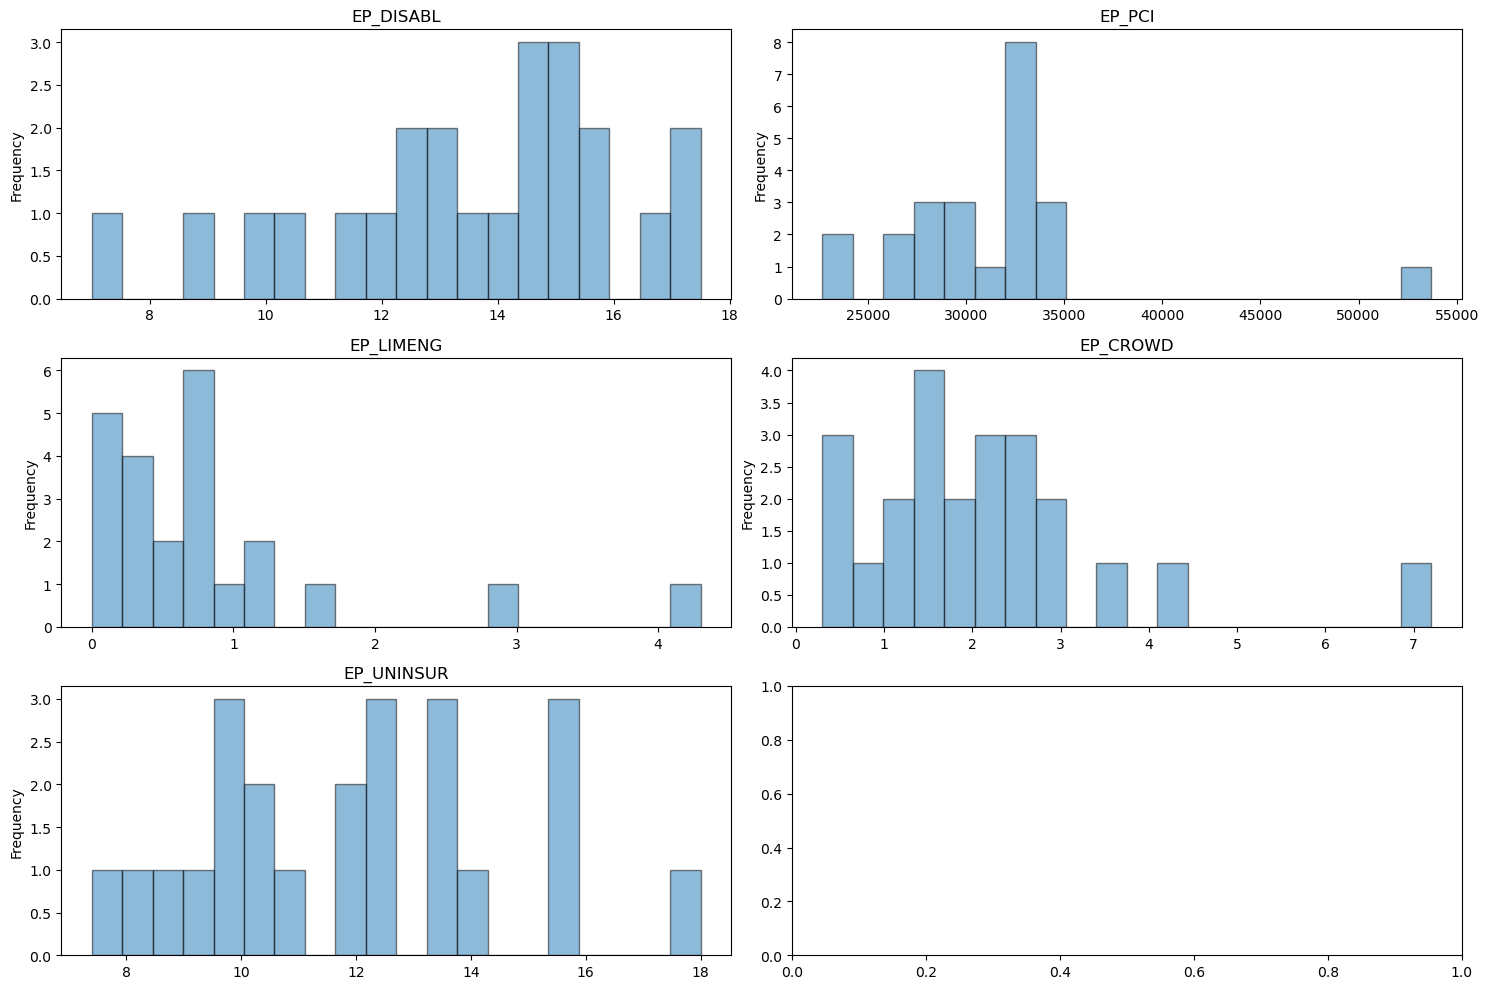

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for i, ax in zip(selectedVariablesWy_, axes.flatten()):
    wySviHepVuRaw[i].plot.hist(bins=20, alpha=0.5, ax=ax, edgecolor='black')
    ax.set_title(i, fontsize=12)  # Adjust the fontsize here

plt.tight_layout()
plt.show()


#### Get number of rows below and above mean

In [9]:
# EP_DISABL
epDisabl_mean = wySviHepVuRaw['EP_DISABL'].mean()
epDisabl_sd = wySviHepVuRaw['EP_DISABL'].std()

# EP_PCI 
epPci_mean = wySviHepVuRaw['EP_PCI'].mean()
epPci_sd = wySviHepVuRaw['EP_PCI'].std()

# EP_LIMENG
epLimeng_mean = wySviHepVuRaw['EP_LIMENG'].mean()
epLimeng_sd = wySviHepVuRaw['EP_LIMENG'].std()

# EP_CROWD
epCrowd_mean = wySviHepVuRaw['EP_CROWD'].mean()
epCrowd_sd = wySviHepVuRaw['EP_CROWD'].std()

# EP_UNINSUR
epUninsur_mean = wySviHepVuRaw['EP_UNINSUR'].mean()
epUninsur_sd = wySviHepVuRaw['EP_UNINSUR'].std()



In [10]:
# for each selected vcariable wy calculate the number of rows that are within 1, 2 standard deviations from the mean
# EP_DISABL
epDisabl_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_DISABL'] >= epDisabl_mean - epDisabl_sd) & (wySviHepVuRaw['EP_DISABL'] <= epDisabl_mean + epDisabl_sd)].shape[0]
epDisabl_2sd = wySviHepVuRaw[(wySviHepVuRaw['EP_DISABL'] >= epDisabl_mean - 2*epDisabl_sd) & (wySviHepVuRaw['EP_DISABL'] <= epDisabl_mean + 2*epDisabl_sd)].shape[0]

# EP_PCI
epPci_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_PCI'] >= epPci_mean - epPci_sd) & (wySviHepVuRaw['EP_PCI'] <= epPci_mean + epPci_sd)].shape[0]
epPci_2sd = wySviHepVuRaw[(wySviHepVuRaw['EP_PCI'] >= epPci_mean - 2*epPci_sd) & (wySviHepVuRaw['EP_PCI'] <= epPci_mean + 2*epPci_sd)].shape[0]

# EP_LIMENG
epLimeng_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_LIMENG'] >= epLimeng_mean - epLimeng_sd) & (wySviHepVuRaw['EP_LIMENG'] <= epLimeng_mean + epLimeng_sd)].shape[0]
epLimeng_2sd = wySviHepVuRaw[(wySviHepVuRaw['EP_LIMENG'] >= epLimeng_mean - 2*epLimeng_sd) & (wySviHepVuRaw['EP_LIMENG'] <= epLimeng_mean + 2*epLimeng_sd)].shape[0]

# EP_CROWD
epCrowd_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_CROWD'] >= epCrowd_mean - epCrowd_sd) & (wySviHepVuRaw['EP_CROWD'] <= epCrowd_mean + epCrowd_sd)].shape[0]
epCrowd_2sd = wySviHepVuRaw[(wySviHepVuRaw['EP_CROWD'] >= epCrowd_mean - 2*epCrowd_sd) & (wySviHepVuRaw['EP_CROWD'] <= epCrowd_mean + 2*epCrowd_sd)].shape[0]

# EP_UNINSUR
epUninsur_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_UNINSUR'] >= epUninsur_mean - epUninsur_sd) & (wySviHepVuRaw['EP_UNINSUR'] <= epUninsur_mean + epUninsur_sd)].shape[0]
epUninsur_2sd = wySviHepVuRaw[(wySviHepVuRaw['EP_UNINSUR'] >= epUninsur_mean - 2*epUninsur_sd) & (wySviHepVuRaw['EP_UNINSUR'] <= epUninsur_mean + 2*epUninsur_sd)].shape[0]

# create a dataframe with the results
data = {'Variable': ['EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR'], 'Mean': [epDisabl_mean, epPci_mean, epLimeng_mean, epCrowd_mean, epUninsur_mean], 'Standard Deviation': [epDisabl_sd, epPci_sd, epLimeng_sd, epCrowd_sd, epUninsur_sd], 'Within 1 SD': [epDisabl_1sd, epPci_1sd, epLimeng_1sd, epCrowd_1sd, epUninsur_1sd], 'Within 2 SD': [epDisabl_2sd, epPci_2sd, epLimeng_2sd, epCrowd_2sd, epUninsur_2sd]}
df = pd.DataFrame(data)
df

,Variable,Mean,Standard Deviation,Within 1 SD,Within 2 SD
0,EP_DISABL,13.456522,2.638840,16,22
1,EP_PCI,31455.086957,5915.914898,20,22
2,EP_LIMENG,0.843478,0.964754,21,21
3,EP_CROWD,2.126087,1.470070,18,22
4,EP_UNINSUR,11.947826,2.699810,16,22


In [11]:
# for each selected vcariable wy calculate the number of rows that are below 1 standard deviation from the mean and rows below mean and above 1 standard deviation
# EP_DISABL
epDisabl_below_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_DISABL'] < epDisabl_mean - epDisabl_sd)].shape[0]
epDisabl_below_mean = wySviHepVuRaw[(wySviHepVuRaw['EP_DISABL'] < epDisabl_mean)].shape[0]
epDisabl_below_mean_plus_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_DISABL'] < epDisabl_mean + epDisabl_sd)].shape[0]

# EP_PCI
epPci_below_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_PCI'] < epPci_mean - epPci_sd)].shape[0]
epPci_below_mean = wySviHepVuRaw[(wySviHepVuRaw['EP_PCI'] < epPci_mean)].shape[0]
epPci_below_mean_plus_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_PCI'] < epPci_mean + epPci_sd)].shape[0]

# EP_LIMENG
epLimeng_below_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_LIMENG'] < epLimeng_mean - epLimeng_sd)].shape[0]
epLimeng_below_mean = wySviHepVuRaw[(wySviHepVuRaw['EP_LIMENG'] < epLimeng_mean)].shape[0]
epLimeng_below_mean_plus_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_LIMENG'] < epLimeng_mean + epLimeng_sd)].shape[0]

# EP_CROWD
epCrowd_below_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_CROWD'] < epCrowd_mean - epCrowd_sd)].shape[0]
epCrowd_below_mean = wySviHepVuRaw[(wySviHepVuRaw['EP_CROWD'] < epCrowd_mean)].shape[0]
epCrowd_below_mean_plus_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_CROWD'] < epCrowd_mean + epCrowd_sd)].shape[0]

# EP_UNINSUR
epUninsur_below_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_UNINSUR'] < epUninsur_mean - epUninsur_sd)].shape[0]
epUninsur_below_mean = wySviHepVuRaw[(wySviHepVuRaw['EP_UNINSUR'] < epUninsur_mean)].shape[0]
epUninsur_below_mean_plus_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_UNINSUR'] < epUninsur_mean + epUninsur_sd)].shape[0]

# create a dataframe with the results
data = {'Variable': ['EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR'], 'Below 1 SD': [epDisabl_below_1sd, epPci_below_1sd, epLimeng_below_1sd, epCrowd_below_1sd, epUninsur_below_1sd], 'Below Mean': [epDisabl_below_mean, epPci_below_mean, epLimeng_below_mean, epCrowd_below_mean, epUninsur_below_mean], 'Below Mean + 1 SD': [epDisabl_below_mean_plus_1sd, epPci_below_mean_plus_1sd, epLimeng_below_mean_plus_1sd, epCrowd_below_mean_plus_1sd, epUninsur_below_mean_plus_1sd]}
df = pd.DataFrame(data)
df

,Variable,Below 1 SD,Below Mean,Below Mean + 1 SD
0,EP_DISABL,4,11,20
1,EP_PCI,2,10,22
2,EP_LIMENG,0,17,21
3,EP_CROWD,3,12,21
4,EP_UNINSUR,3,10,19


### Adjacency Method

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import itertools
from itertools import combinations
from scipy import spatial
import pickle as pickle
import gudhi
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import io
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageChops, ImageFont
import shapely.geometry as geom
from shapely.ops import unary_union
import warnings

import invr

In [13]:
wyFiltered = wySviHepVuRaw[selectedVariablesWy]

In [14]:
#reset index
wyFiltered = wyFiltered.reset_index(drop=True)

In [15]:
wyFiltered.head(3)

,FIPS,EP_DISABL,EP_PCI,EP_LIMENG,EP_CROWD,EP_UNINSUR,geometry
0,56003,15.1,23978.0,0.8,2.3,15.8,"POLYGON ((-108.62184 44.99613, -108.62182 44.9..."
1,56007,11.4,29890.0,2.8,3.5,10.3,"POLYGON ((-107.92977 41.65419, -107.92974 41.6..."
2,56009,16.5,32069.0,0.2,2.6,8.5,"POLYGON ((-106.07807 43.49447, -106.01737 43.4..."


Generate adjacent counties

In [16]:
def generate_adjacent_counties(dataframe,filtration_threshold,variable_name):
    filtered_df = dataframe[dataframe[variable_name] < filtration_threshold]

    # Perform a spatial join to find adjacent precincts
    adjacent_counties = gpd.sjoin(filtered_df, filtered_df, predicate='intersects', how='left')

    # Filter the results to include only the adjacent states
    adjacent_counties = adjacent_counties.query('sortedID_left != sortedID_right')

    # Group the resulting dataframe by the original precinct Name and create a list of adjacent precinct Name
    adjacent_counties = adjacent_counties.groupby('sortedID_left')['sortedID_right'].apply(list).reset_index()

    adjacent_counties.rename(columns={'sortedID_left': 'county', 'sortedID_right': 'adjacent'}, inplace=True)

    adjacencies_list = adjacent_counties['adjacent'].tolist()
    county_list = adjacent_counties['county'].tolist()

    merged_df = pd.merge(adjacent_counties, dataframe, left_on='county',right_on='sortedID', how='left')
    merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')

    return adjacencies_list,merged_df,county_list

In [17]:
def form_simplicial_complex(adjacent_county_list,county_list):
    max_dimension = 3

    V = []
    V = invr.incremental_vr(V, adjacent_county_list, max_dimension,county_list)

    return V

In [18]:
def fig2img(fig):
     #convert matplot fig to image and return it

     buf = io.BytesIO()
     fig.savefig(buf)
     buf.seek(0)
     img = Image.open(buf)
     return img

In [19]:
def plot_simplicial_complex(dataframe,V):

    #city centroids
    city_coordinates = {city.sortedID: np.array((city.geometry.centroid.x, city.geometry.centroid.y)) for _, city in dataframe.iterrows()}

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_axis_off() 

    # Plot the "wyoming_svi" DataFrame
    dataframe.plot(ax=ax, edgecolor='black', linewidth=0.3, color="white")

    # Plot the centroid of the large square with values
    for i, row in dataframe.iterrows():
        centroid = row['geometry'].centroid
        # text_to_display = f"FIPS: {row['FIPS']}\nFilteration: {row['EP_SNGPNT']}"
        plt.text(centroid.x, centroid.y, str(row['FIPS']), fontsize=8, ha='center', color="black")
        # plt.text(centroid.x, centroid.y, text_to_display, fontsize=10, ha='center', color="black")

    for edge_or_traingle in V:

        
        if len(edge_or_traingle) == 2:
            # Plot an edge
            ax.plot(*zip(*[city_coordinates[vertex] for vertex in edge_or_traingle]), color='red', linewidth=2)
            # img = fig2img(fig)
            # list_gif.append(img)
        elif len(edge_or_traingle) == 3:
            # Plot a triangle
            ax.add_patch(plt.Polygon([city_coordinates[vertex] for vertex in edge_or_traingle], color='green', alpha=0.2))
            # img = fig2img(fig)
            # list_gif.append(img)
    plt.show()
    plt.close()

    #return list_gif #deleted  plot_simplicial_complex(dataframe,V,list_gif) --> list part

##### Multiple variable code starts here

In [20]:
selected_variables_and_threshold = {'EP_DISABL': (epDisabl_mean-epDisabl_sd), 'EP_PCI': (epPci_mean-epPci_sd), 'EP_LIMENG': (epLimeng_mean-epLimeng_sd), 'EP_CROWD': (epCrowd_mean-epCrowd_sd), 'EP_UNINSUR': (epUninsur_mean-epUninsur_sd)}

In [21]:
# create a empty dictionary
edges_and_traingles_for_each_variable_below_1sd = {}

Plotting simplicial complex for EP_DISABL variable at threshold 10.81768141412599


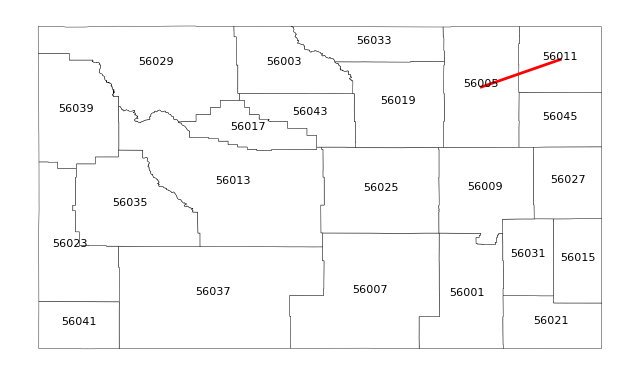

Plotting simplicial complex for EP_PCI variable at threshold 25539.17205829983


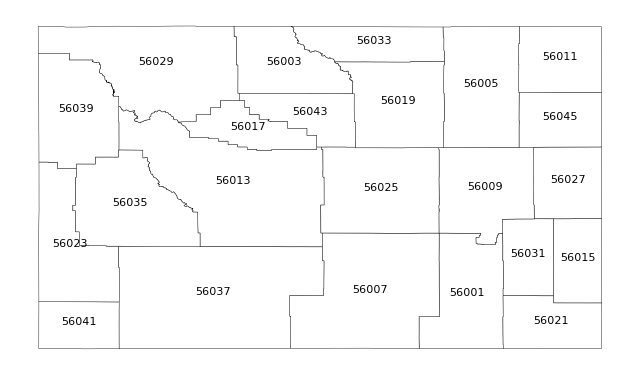

Plotting simplicial complex for EP_LIMENG variable at threshold -0.12127610586960258


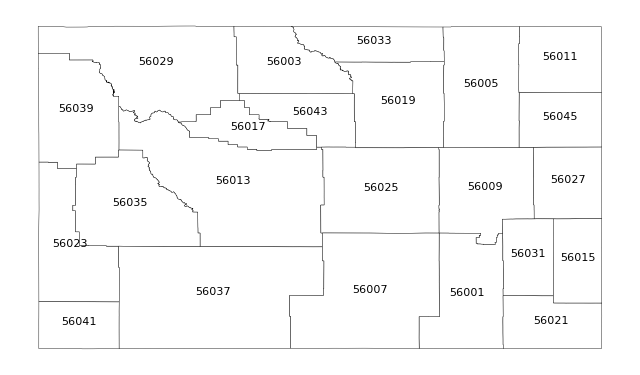

Plotting simplicial complex for EP_CROWD variable at threshold 0.6560166454931855


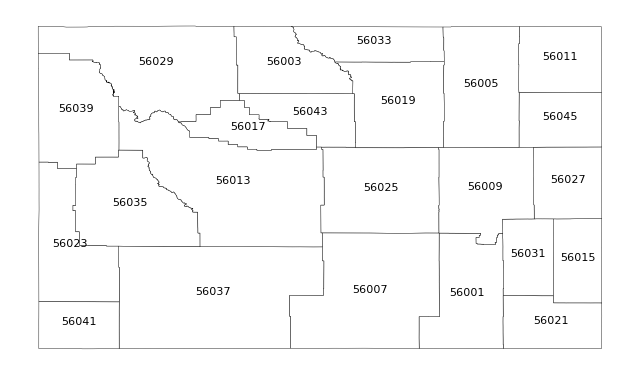

Plotting simplicial complex for EP_UNINSUR variable at threshold 9.248016402549895


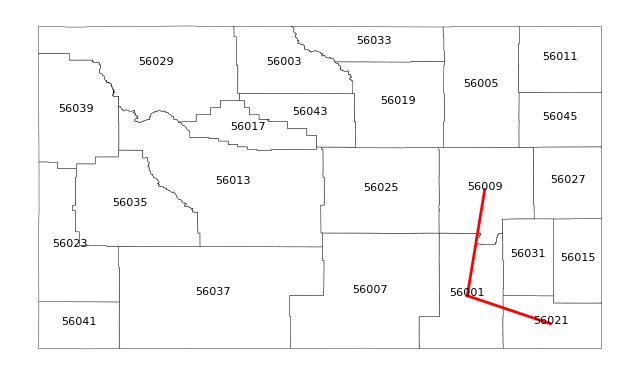

In [22]:
for variable_name, threshold in selected_variables_and_threshold.items():

    # Sorting based on the variable and selecting only the FIPS and the variable columns is important
    # Also we need to keep  the dataframe sorted based on the variable

    df_one_variable = wyFiltered[['FIPS',variable_name, 'geometry']]

    # # Sorting the DataFrame based on the 'rate' column
    df_one_variable = df_one_variable.sort_values(by=variable_name)
    df_one_variable['sortedID'] = range(len(df_one_variable))

    # Convert the DataFrame to a GeoDataFrame
    df_one_variable = gpd.GeoDataFrame(df_one_variable, geometry='geometry')
    df_one_variable.crs = "EPSG:3395"  # This is a commonly used projected CRS

    adjacencies_list,adjacent_counties_df,county_list = generate_adjacent_counties(df_one_variable,threshold,variable_name)

    # create a dictionary adjacent_counties_df column county as key and column adjacent as value(to avoid NULL adjacencies error)
    adjacent_counties_dict = dict(zip(adjacent_counties_df['county'],adjacent_counties_df['adjacent']))

    # this take only counties that have adjacent counties
    county_list = adjacent_counties_df['county'].tolist()

    V = form_simplicial_complex(adjacent_counties_dict,county_list)

    # This is a new feature that I added to the code. It creates a new list replace the sorted ID with the FIPS on the V list
    # create a new list replace the sorted ID with the FIPS on the V list
    V_FIPS = [[df_one_variable.iloc[x]['FIPS'] for x in i] for i in V]
    
    #add V list to the edges_and_traingles_for_each_variable dictionary with the key as the variable name
    edges_and_traingles_for_each_variable_below_1sd[variable_name] = V_FIPS

    # # # store the list of images for each variable
    # # list_img = []

    # # plot the simplicial complex
    print(f"Plotting simplicial complex for {variable_name} variable at threshold {threshold}")
    plot_simplicial_complex(df_one_variable,V)

In [23]:
selected_variables_and_threshold = {'EP_DISABL': (epDisabl_mean), 'EP_PCI': (epPci_mean), 'EP_LIMENG': (epLimeng_mean), 'EP_CROWD': (epCrowd_mean), 'EP_UNINSUR': (epUninsur_mean)}
# create a empty dictionary
edges_and_traingles_for_each_variable_below_mean = {}

Plotting simplicial complex for EP_DISABL variable at threshold 13.456521739130435


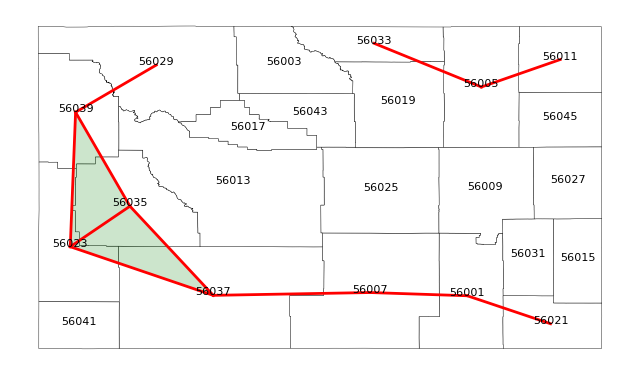

Plotting simplicial complex for EP_PCI variable at threshold 31455.08695652174


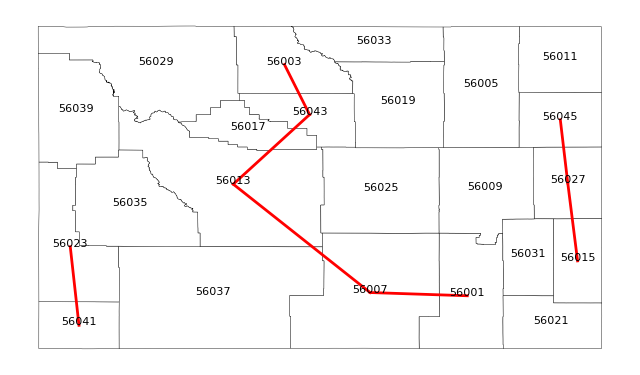

Plotting simplicial complex for EP_LIMENG variable at threshold 0.8434782608695651


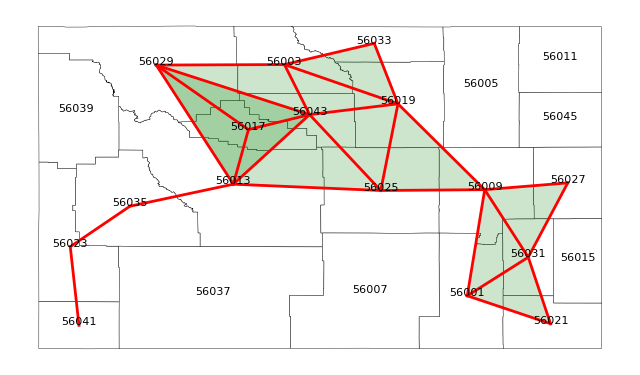

Plotting simplicial complex for EP_CROWD variable at threshold 2.126086956521739


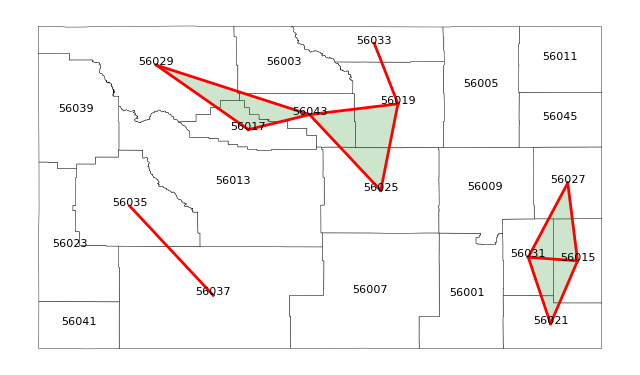

Plotting simplicial complex for EP_UNINSUR variable at threshold 11.947826086956523


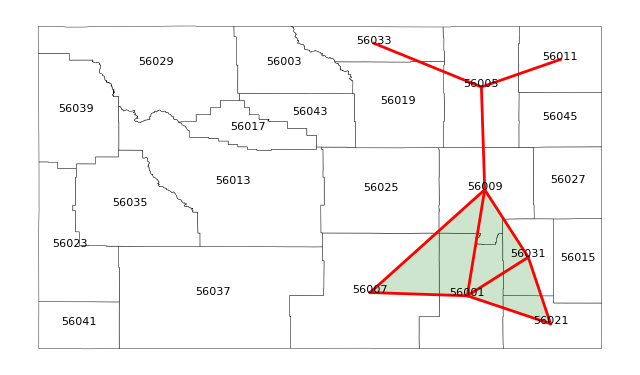

In [24]:
for variable_name, threshold in selected_variables_and_threshold.items():

    # Sorting based on the variable and selecting only the FIPS and the variable columns is important
    # Also we need to keep  the dataframe sorted based on the variable

    df_one_variable = wyFiltered[['FIPS',variable_name, 'geometry']]

    # # Sorting the DataFrame based on the 'rate' column
    df_one_variable = df_one_variable.sort_values(by=variable_name)
    df_one_variable['sortedID'] = range(len(df_one_variable))

    # Convert the DataFrame to a GeoDataFrame
    df_one_variable = gpd.GeoDataFrame(df_one_variable, geometry='geometry')
    df_one_variable.crs = "EPSG:3395"  # This is a commonly used projected CRS

    adjacencies_list,adjacent_counties_df,county_list = generate_adjacent_counties(df_one_variable,threshold,variable_name)

    # create a dictionary adjacent_counties_df column county as key and column adjacent as value(to avoid NULL adjacencies error)
    adjacent_counties_dict = dict(zip(adjacent_counties_df['county'],adjacent_counties_df['adjacent']))

    # this take only counties that have adjacent counties
    county_list = adjacent_counties_df['county'].tolist()

    V = form_simplicial_complex(adjacent_counties_dict,county_list)

    # This is a new feature that I added to the code. It creates a new list replace the sorted ID with the FIPS on the V list
    # create a new list replace the sorted ID with the FIPS on the V list
    V_FIPS = [[df_one_variable.iloc[x]['FIPS'] for x in i] for i in V]

    #add V list to the edges_and_traingles_for_each_variable dictionary with the key as the variable name
    edges_and_traingles_for_each_variable_below_mean[variable_name] = V_FIPS

    # # # store the list of images for each variable
    # # list_img = []

    # # plot the simplicial complex
    print(f"Plotting simplicial complex for {variable_name} variable at threshold {threshold}")
    plot_simplicial_complex(df_one_variable,V)

In [25]:
selected_variables_and_threshold = {'EP_DISABL': (epDisabl_mean+epDisabl_sd), 'EP_PCI': (epPci_mean+epPci_sd), 'EP_LIMENG': (epLimeng_mean+epLimeng_sd), 'EP_CROWD': (epCrowd_mean+epCrowd_sd), 'EP_UNINSUR': (epUninsur_mean+epUninsur_sd)}
# create a empty dictionary
edges_and_traingles_for_each_variable_below_mean_plus_1sd = {}

Plotting simplicial complex for EP_DISABL variable at threshold 16.095362064134882


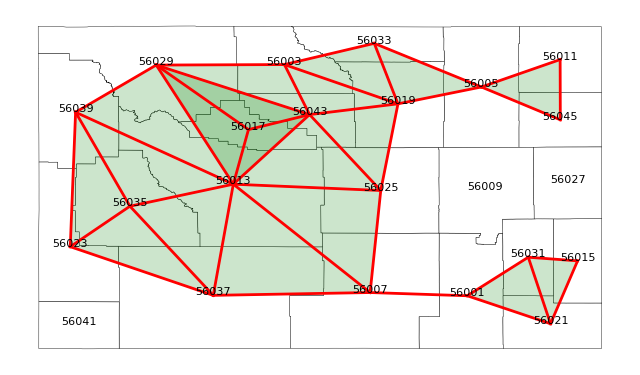

Plotting simplicial complex for EP_PCI variable at threshold 37371.00185474365


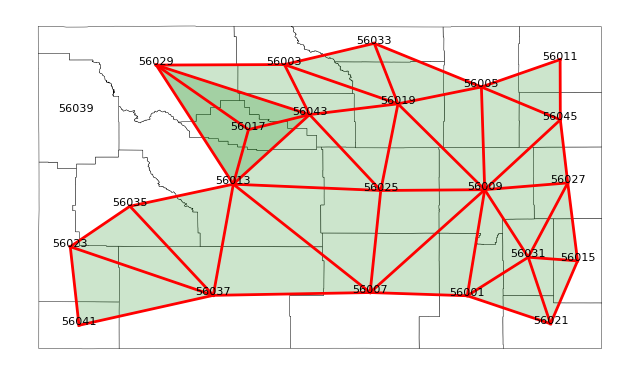

Plotting simplicial complex for EP_LIMENG variable at threshold 1.8082326276087328


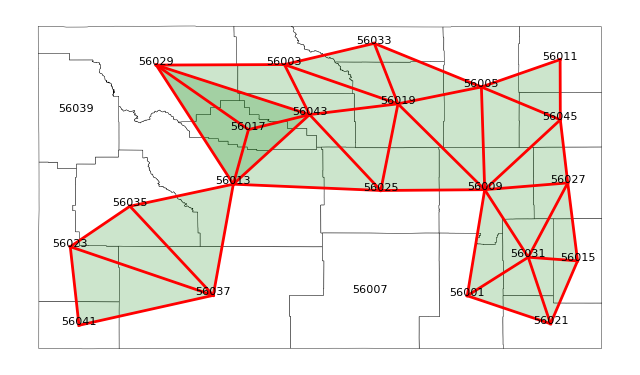

Plotting simplicial complex for EP_CROWD variable at threshold 3.596157267550293


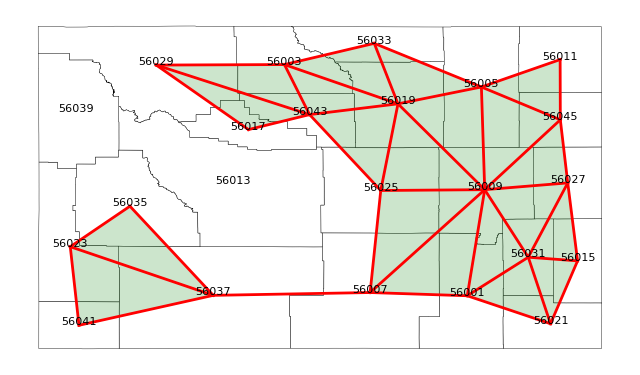

Plotting simplicial complex for EP_UNINSUR variable at threshold 14.64763577136315


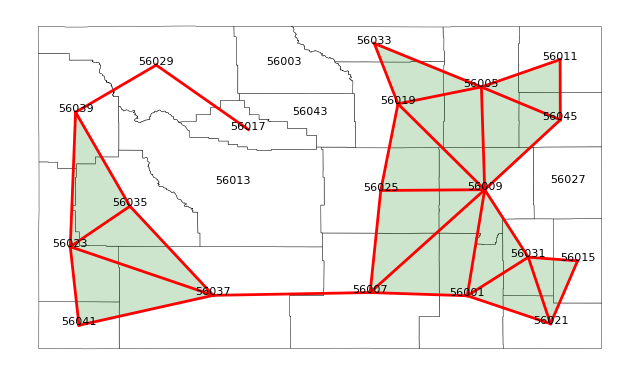

In [26]:
for variable_name, threshold in selected_variables_and_threshold.items():

    # Sorting based on the variable and selecting only the FIPS and the variable columns is important
    # Also we need to keep  the dataframe sorted based on the variable

    df_one_variable = wyFiltered[['FIPS',variable_name, 'geometry']]

    # # Sorting the DataFrame based on the 'rate' column
    df_one_variable = df_one_variable.sort_values(by=variable_name)
    df_one_variable['sortedID'] = range(len(df_one_variable))

    # Convert the DataFrame to a GeoDataFrame
    df_one_variable = gpd.GeoDataFrame(df_one_variable, geometry='geometry')
    df_one_variable.crs = "EPSG:3395"  # This is a commonly used projected CRS

    adjacencies_list,adjacent_counties_df,county_list = generate_adjacent_counties(df_one_variable,threshold,variable_name)

    # create a dictionary adjacent_counties_df column county as key and column adjacent as value(to avoid NULL adjacencies error)
    adjacent_counties_dict = dict(zip(adjacent_counties_df['county'],adjacent_counties_df['adjacent']))

    # this take only counties that have adjacent counties
    county_list = adjacent_counties_df['county'].tolist()

    V = form_simplicial_complex(adjacent_counties_dict,county_list)

    # This is a new feature that I added to the code. It creates a new list replace the sorted ID with the FIPS on the V list
    # create a new list replace the sorted ID with the FIPS on the V list
    V_FIPS = [[df_one_variable.iloc[x]['FIPS'] for x in i] for i in V]

    #add V list to the edges_and_traingles_for_each_variable dictionary with the key as the variable name
    edges_and_traingles_for_each_variable_below_mean_plus_1sd[variable_name] = V_FIPS

    # # # store the list of images for each variable
    # # list_img = []

    # # plot the simplicial complex
    print(f"Plotting simplicial complex for {variable_name} variable at threshold {threshold}")
    plot_simplicial_complex(df_one_variable,V)

##### Create a matrix for the full region(without filtering)

In [27]:
selectedRegionsEP_DISABL = []
selectedRegionsEP_PCI = []
selectedRegionsEP_LIMENG = []
selectedRegionsEP_CROWD = []
selectedRegionsEP_UNINSUR = []

In [28]:
# loop through the dictionary and for each variable create a list of edges
for variable_name, V_FIPS in edges_and_traingles_for_each_variable_below_mean.items():
    for set in V_FIPS:
        if len(set) == 2 or len(set) == 3:
            # if variable is EP_DISABL
            if variable_name == 'EP_DISABL':
                #check if the edge(both values) is not already in the list
                for vertice in set:
                    if vertice not in selectedRegionsEP_DISABL:
                        selectedRegionsEP_DISABL.append(vertice)
            elif variable_name == 'EP_PCI':
                for vertice in set:
                    if vertice not in selectedRegionsEP_PCI:
                        selectedRegionsEP_PCI.append(vertice)
            elif variable_name == 'EP_LIMENG':
                for vertice in set:
                    if vertice not in selectedRegionsEP_LIMENG:
                        selectedRegionsEP_LIMENG.append(vertice)
            elif variable_name == 'EP_CROWD':
                for vertice in set:
                    if vertice not in selectedRegionsEP_CROWD:
                        selectedRegionsEP_CROWD.append(vertice)
            elif variable_name == 'EP_UNINSUR':
                for vertice in set:
                    if vertice not in selectedRegionsEP_UNINSUR:
                        selectedRegionsEP_UNINSUR.append(vertice)
        


#### Create adjacency matrix from filtered regions
Matrix dimetions will be smaller

In [29]:
from pysal.lib import weights
import pandas

In [30]:
fullMatrixEP_DISABL = pandas.DataFrame(np.zeros(shape=(23,23)).astype(int))
fullMatrixEP_PCI = pandas.DataFrame(np.zeros(shape=(23,23)).astype(int))
fullMatrixEP_LIMENG = pandas.DataFrame(np.zeros(shape=(23,23)).astype(int))
fullMatrixEP_CROWD = pandas.DataFrame(np.zeros(shape=(23,23)).astype(int))
fullMatrixEP_UNINSUR = pandas.DataFrame(np.zeros(shape=(23,23)).astype(int))


# replace index with FIPS and column names with FIPS
fullMatrixEP_DISABL.index = wySviHepVuRaw["FIPS"].values
fullMatrixEP_DISABL.columns = wySviHepVuRaw["FIPS"].values

fullMatrixEP_PCI.index = wySviHepVuRaw["FIPS"].values
fullMatrixEP_PCI.columns = wySviHepVuRaw["FIPS"].values

fullMatrixEP_LIMENG.index = wySviHepVuRaw["FIPS"].values
fullMatrixEP_LIMENG.columns = wySviHepVuRaw["FIPS"].values

fullMatrixEP_CROWD.index = wySviHepVuRaw["FIPS"].values
fullMatrixEP_CROWD.columns = wySviHepVuRaw["FIPS"].values

fullMatrixEP_UNINSUR.index = wySviHepVuRaw["FIPS"].values
fullMatrixEP_UNINSUR.columns = wySviHepVuRaw["FIPS"].values


In [31]:
fullMatrixEP_DISABL

,56003,56007,56009,56011,56013,56015,56019,56021,56025,56029,...,56043,56045,56001,56005,56017,56023,56027,56037,56041,56039
56003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
selectedRegionsEP_DISABL = []
selectedRegionsEP_PCI = []
selectedRegionsEP_LIMENG = []
selectedRegionsEP_CROWD = []
selectedRegionsEP_UNINSUR = []

In [33]:
# loop through the dictionary and for each variable create a list of edges
for variable_name, V_FIPS in edges_and_traingles_for_each_variable_below_mean.items():
    for set in V_FIPS:
        if len(set) == 2 or len(set) == 3:
            # if variable is EP_DISABL
            if variable_name == 'EP_DISABL':
                #check if the edge(both values) is not already in the list
                for vertice in set:
                    if vertice not in selectedRegionsEP_DISABL:
                        selectedRegionsEP_DISABL.append(vertice)
            elif variable_name == 'EP_PCI':
                for vertice in set:
                    if vertice not in selectedRegionsEP_PCI:
                        selectedRegionsEP_PCI.append(vertice)
            elif variable_name == 'EP_LIMENG':
                for vertice in set:
                    if vertice not in selectedRegionsEP_LIMENG:
                        selectedRegionsEP_LIMENG.append(vertice)
            elif variable_name == 'EP_CROWD':
                for vertice in set:
                    if vertice not in selectedRegionsEP_CROWD:
                        selectedRegionsEP_CROWD.append(vertice)
            elif variable_name == 'EP_UNINSUR':
                for vertice in set:
                    if vertice not in selectedRegionsEP_UNINSUR:
                        selectedRegionsEP_UNINSUR.append(vertice)

In [34]:
#create a dictionary to store the selected regions and relevent Q Full matrix for each variable
selectedRegionsAndQ = {'EP_DISABL': [selectedRegionsEP_DISABL,fullMatrixEP_DISABL], 'EP_PCI': [selectedRegionsEP_PCI,fullMatrixEP_PCI], 'EP_LIMENG': [selectedRegionsEP_LIMENG,fullMatrixEP_LIMENG], 'EP_CROWD': [selectedRegionsEP_CROWD,fullMatrixEP_CROWD], 'EP_UNINSUR': [selectedRegionsEP_UNINSUR,fullMatrixEP_UNINSUR]}


In [35]:
from pysal.lib import weights

In [38]:
for variable_name, selectedSubRegionsAndFullQ in selectedRegionsAndQ.items():
    # filter gdf dataframe to select few counties
    filteredSubRegionsDf = wyFiltered.loc[wyFiltered["FIPS"].isin(selectedSubRegionsAndFullQ[0])]

    # lattice stored in a geo-table
    wq = weights.contiguity.Queen.from_dataframe(filteredSubRegionsDf)
    neighbors_q = wq.neighbors

    QTemp = pandas.DataFrame(*wq.full()).astype(int)
    QTemp = QTemp.multiply(-1)

    QTemp.index = filteredSubRegionsDf["FIPS"].values
    QTemp.columns = filteredSubRegionsDf["FIPS"].values

    # fill the full matrix with the values from the QTemp dataframe by matching the index and column names
    for i in QTemp.index:
        for j in QTemp.columns:
            selectedSubRegionsAndFullQ[1].loc[i,j] = QTemp.loc[i,j]

    # for each row in the fullMatrix dataframe sum the values in the row and take the absolute value and store in the diagonal
    for i in selectedSubRegionsAndFullQ[1].index:
        selectedSubRegionsAndFullQ[1].loc[i,i] = abs(selectedSubRegionsAndFullQ[1].loc[i].sum())

    # print(f"variable: {variable_name}")
    # print(f"Determinant of Q: {np.linalg.det(QTemp)}")


variable: EP_DISABL
Determinant of Q: 0.0
variable: EP_PCI
Determinant of Q: 0.0
variable: EP_LIMENG
Determinant of Q: -19.999999999999996
variable: EP_CROWD
Determinant of Q: 0.0
variable: EP_UNINSUR
Determinant of Q: 0.0


/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


#### Log Odds Ratio

In [41]:
selectedRegionsAndQ['EP_DISABL'][1]

,56003,56007,56009,56011,56013,56015,56019,56021,56025,56029,...,56043,56045,56001,56005,56017,56023,56027,56037,56041,56039
56003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56007,0,2,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,-1,0,0
56009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56011,0,0,0,1,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
56013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56021,0,0,0,0,0,0,0,1,0,0,...,0,0,-1,0,0,0,0,0,0,0
56025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56029,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-1


In [42]:
for variable_name, selectedSubRegionsAndFullQ in selectedRegionsAndQ.items():
    print(f"Variable: {variable_name}")
    print(f"Q Matrix : {selectedSubRegionsAndFullQ[1].shape}")
    print(f"Q Matrix : {selectedSubRegionsAndFullQ[1]}")

    break


Variable: EP_DISABL
Q Matrix : (23, 23)
Q Matrix :        56003  56007  56009  56011  56013  56015  56019  56021  56025  56029  \
56003      0      0      0      0      0      0      0      0      0      0   
56007      0      2      0      0      0      0      0      0      0      0   
56009      0      0      0      0      0      0      0      0      0      0   
56011      0      0      0      1      0      0      0      0      0      0   
56013      0      0      0      0      0      0      0      0      0      0   
56015      0      0      0      0      0      0      0      0      0      0   
56019      0      0      0      0      0      0      0      0      0      0   
56021      0      0      0      0      0      0      0      1      0      0   
56025      0      0      0      0      0      0      0      0      0      0   
56029      0      0      0      0      0      0      0      0      0      1   
56031      0      0      0      0      0      0      0      0      0      0   
5

# testing the risk - Not sure the code below

In [49]:
# create a dictionary to store the constant values
constantValues = {'EP_DISABL': 0.4, 'EP_PCI': 0.6, 'EP_LIMENG': 0.3, 'EP_CROWD': 0.4, 'EP_UNINSUR': 0.8}

In [50]:

logOddsRatio = 0
for variable_name, selectedSubRegionsAndFullQ in selectedRegionsAndQ.items():

    # print(f"Variable: {variable_name}")
    # print(f"Q Matrix : {selectedSubRegionsAndFullQ[1]}")

    # multiply Q matrix with the constant value
    logOddsRatio = logOddsRatio + selectedSubRegionsAndFullQ[1].multiply(constantValues[variable_name])

In [51]:
logOddsRatio

,56003,56007,56009,56011,56013,56015,56019,56021,56025,56029,...,56043,56045,56001,56005,56017,56023,56027,56037,56041,56039
56003,1.8,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,-0.3,...,-0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56007,0.0,3.6,-0.8,0.0,-0.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.8,0.0,0.0,0.0,0.0,-0.4,0.0,0.0
56009,0.0,-0.8,4.7,0.0,0.0,0.0,-0.3,0.0,-0.3,0.0,...,0.0,0.0,-1.1,-0.8,0.0,0.0,-0.3,0.0,0.0,0.0
56011,0.0,0.0,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.2,0.0,0.0,0.0,0.0,0.0,0.0
56013,0.0,-0.6,0.0,0.0,2.7,0.0,0.0,0.0,-0.3,-0.3,...,-0.9,0.0,0.0,0.0,-0.3,0.0,0.0,0.0,0.0,0.0
56015,0.0,0.0,0.0,0.0,0.0,1.8,0.0,-0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
56019,-0.3,0.0,-0.3,0.0,0.0,0.0,2.7,0.0,-0.7,0.0,...,-0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56021,0.0,0.0,0.0,0.0,0.0,-0.4,0.0,3.4,0.0,0.0,...,0.0,0.0,-1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56025,0.0,0.0,-0.3,0.0,-0.3,0.0,-0.7,0.0,2.0,0.0,...,-0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56029,-0.3,0.0,0.0,0.0,-0.3,0.0,0.0,0.0,0.0,2.4,...,-0.7,0.0,0.0,0.0,-0.7,0.0,0.0,0.0,0.0,-0.4


In [54]:
# get the diagonal of the logOddsRatio matrix and store in a new dataframe with column name as FIPS
logOddsRatioDiagonal = pandas.DataFrame(np.diag(logOddsRatio)).astype(float)
logOddsRatioDiagonal.index = wyFiltered["FIPS"].values

In [57]:
df_test = wySviHepVuRaw.copy()

# add new column as logOddsRatio by matching the FIPS values
df_test['logOddsRatio'] = df_test['FIPS'].map(logOddsRatioDiagonal[0])


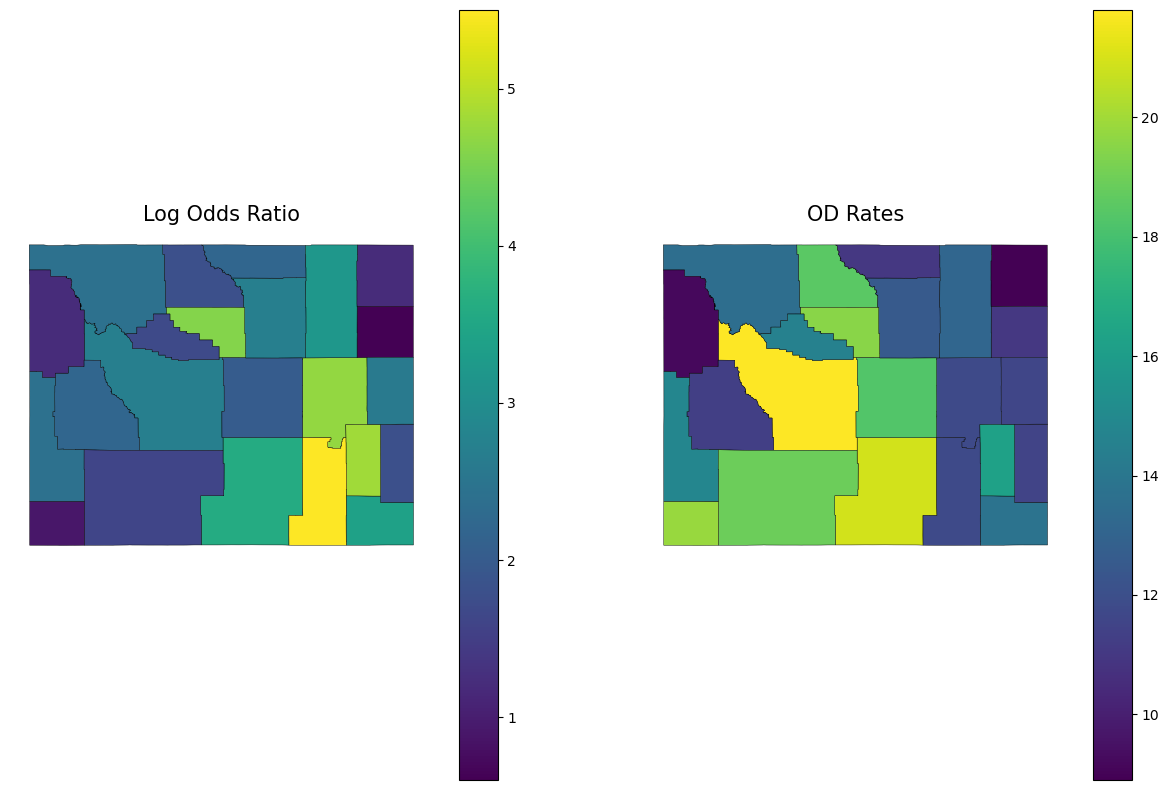

In [60]:
# plot logOddsRatio and OD Rates side by side

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

df_test.plot(column='logOddsRatio', ax=axes[0], legend=True, cmap='viridis', edgecolor='black', linewidth=0.3)
axes[0].set_title('Log Odds Ratio', fontsize=15)
axes[0].axis('off')

df_test.plot(column='NOD_Rate', ax=axes[1], legend=True, cmap='viridis', edgecolor='black', linewidth=0.3)
axes[1].set_title('OD Rates', fontsize=15)
axes[1].axis('off')

plt.show()
